In [1]:
# Import Libraries

import pandas as pd
import os
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# Import Data 

data = pd.read_csv(os.getcwd() +'/das.csv')
raw_data = data.copy()
data.columns

Index(['name', 'continent', 'country', 'city', 'univ_image', 'r1', 's1', 'e1',
       'r2', 's2', 'e2', 'r3', 's3', 'e3', 'r4', 's4', 'e4', 'r5', 's5', 'e5',
       'sem1_weather', 'sem1_temp_mean', 'sem1_rain_mean', 'sem1_period',
       'sem2_weather', 'sem2_temp_mean', 'sem2_rain_mean', 'sem2_period',
       'domi', 'domi_0', 'per_domi', 'travel_idx', 'title1', 'image1',
       'title2', 'image2', 'title3', 'image3', 'trip_link', 'living_num',
       'living_idx', 'crime_num', 'crime_idx', 'language', 'inter_stu_ratio',
       'traffic_score', 'bus', 'train', 'gvi_idx', 'sdg_idx', 'one_year',
       'gpa', 'TOEFL', 'IELTS', 'etc', 'uniq', 'hashtag1', 'hashtag2',
       'hashtag3', 'recommend_place1', 'recommend_place2', 'score',
       'wordcloud1_url', 'wordcloud2_url', 'wordcloud3_url', 'wordcloud4_url',
       'wordcloud5_url', 'wordcloud6_url', 'wordcloud7_url', 'wordcloud8_url',
       'wordcloud9_url'],
      dtype='object')

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sem1_temp_mean   999 non-null    float64
 1   sem1_rain_mean   999 non-null    float64
 2   sem2_temp_mean   999 non-null    float64
 3   sem2_rain_mean   999 non-null    float64
 4   travel_idx       999 non-null    float64
 5   bus              999 non-null    float64
 6   train            999 non-null    float64
 7   living_idx       999 non-null    float64
 8   crime_idx        999 non-null    float64
 9   inter_stu_ratio  999 non-null    float64
 10  gvi_idx          999 non-null    float64
 11  sdg_idx          999 non-null    float64
 12  sem1_temp_mean   999 non-null    float64
 13  sem1_rain_mean   999 non-null    float64
 14  sem2_temp_mean   999 non-null    float64
 15  sem2_rain_mean   999 non-null    float64
 16  travel_idx       999 non-null    float64
 17  bus             

In [38]:
## Selecting columns for t-SNE model

### 학업 관련 
studies = ['s1','s2','s3','s4','s5','gpa','TOEFL']
### 사회적 가치 관련 
ESG_idxes = ['living_idx','crime_idx','inter_stu_ratio','gvi_idx','sdg_idx']
### 날씨 및 여행 관련 
travels = ['sem1_temp_mean','sem1_rain_mean','sem2_temp_mean','sem2_rain_mean','travel_idx','bus','train']


In [39]:
# fillNa to t-SNE model

data[studies] = data[studies].apply(lambda x: x.fillna(x.min()), axis = 0)
data[ESG_idxes] = data[ESG_idxes].apply(lambda x: x.fillna(x.mean()), axis = 0)
data[travels] = data[travels].apply(lambda x: x.fillna(x.mean()), axis = 0)

data = data[travels + ESG_idxes +travels]

In [50]:

# 2차원으로 차원 축소
n_components = 2

# t-sne 모델 생성
model = TSNE(n_components=2, perplexity=40.0, early_exaggeration=12.0,
     learning_rate=200.0, n_iter=1000, n_iter_without_progress=300,
     min_grad_norm=1e-07, metric='euclidean', init='random', verbose=0,
     random_state=None, method='barnes_hut', angle=0.5)

# 학습한 결과 2차원 공간 값 출력
trans_data = model.fit_transform(data)




/Users/onmywave/miniforge3/envs/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


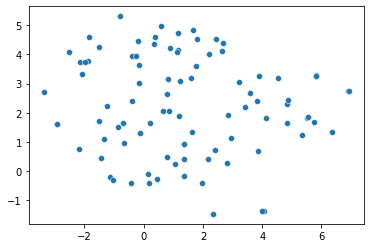

In [51]:

palette = sns.color_palette("bright", 10)
sns.scatterplot(trans_data[:,0], trans_data[:,1], legend='full', palette=palette)
plt.show()


In [43]:
titled_data = pd.DataFrame(trans_data)

titled_data['name'] = raw_data['name']
titled_data.columns = ['component1','component2','name']

titled_data

,component1,component2,name
0,6.602726,-4.959789,National University of Singapore
1,0.394358,-7.523468,University of Leeds
2,-0.790794,-6.083950,University of Texas at Austin
3,-1.424123,-1.521964,Sciences Po
4,-3.168869,-1.072887,University of Calgary
...,...,...,...
88,-4.472218,-2.926834,California State University
89,1.688105,-2.851772,University of Zurich
90,-6.811232,-2.825307,Peking University
91,3.990893,-9.633844,Ochanomizu University


In [8]:
titled_data.to_csv('titled_data.csv')

In [9]:
data.to_csv('data.csv')